In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [4]:
df=pd.read_csv("Gaming and Mental Health.csv")

In [3]:
df

,record_id,age,gender,daily_gaming_hours,game_genre,primary_game,gaming_platform,sleep_hours,sleep_quality,sleep_disruption_frequency,...,continued_despite_problems,eye_strain,back_neck_pain,weight_change_kg,exercise_hours_weekly,social_isolation_score,face_to_face_social_hours_weekly,monthly_game_spending_usd,years_gaming,gaming_addiction_risk_level
0,GD0001,17,Male,11.1,Mobile Games,Clash of Clans,PC,3.7,Very Poor,Sometimes,...,True,True,False,6.8,3.7,7,1.3,383.70,3,Severe
1,GD0002,21,Male,3.0,MOBA,Dota 2,PC,7.2,Fair,Rarely,...,False,False,False,0.4,8.5,2,10.7,46.64,1,Low
2,GD0003,23,Male,7.6,FPS,CS:GO,Multi-platform,4.4,Fair,Often,...,True,False,True,1.8,7.1,5,3.2,100.81,6,Severe
3,GD0004,20,Female,7.2,RPG,Skyrim,Multi-platform,5.1,Fair,Often,...,False,True,True,0.2,5.2,4,9.1,51.60,7,High
4,GD0005,18,Male,6.8,Battle Royale,Apex Legends,PC,3.4,Poor,Never,...,False,False,False,0.5,6.1,4,4.5,32.57,1,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,GD0996,15,Female,8.6,Strategy,Age of Empires,PC,4.1,Very Poor,Always,...,True,True,True,1.9,7.5,6,2.4,426.54,3,Severe
996,GD0997,18,Male,5.4,MMO,Elder Scrolls Online,Multi-platform,6.5,Fair,Never,...,False,True,False,2.1,7.7,1,10.9,83.71,7,Low
997,GD0998,23,Male,7.3,RPG,Skyrim,PC,3.9,Insomnia,Rarely,...,False,False,True,0.5,8.1,5,6.7,88.60,5,High
998,GD0999,18,Male,3.1,Strategy,StarCraft II,Console,8.2,Fair,Sometimes,...,False,False,False,0.8,8.4,1,12.7,22.02,8,Low


In [4]:
unique_genres = df['primary_game'].unique()
print(unique_genres)

['Clash of Clans' 'Dota 2' 'CS:GO' 'Skyrim' 'Apex Legends' 'Call of Duty'
 'Genshin Impact' 'Final Fantasy XIV' 'StarCraft II' 'Elden Ring'
 'League of Legends' 'Warzone' 'Cyberpunk 2077' 'PUBG' 'Candy Crush'
 'World of Warcraft' 'PUBG Mobile' 'Mobile Legends' 'Elder Scrolls Online'
 'Valorant' 'Age of Empires' 'Civilization VI' 'Fortnite' 'Overwatch']


In [5]:
df.shape

(1000, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   record_id                         1000 non-null   object 
 1   age                               1000 non-null   int64  
 2   gender                            1000 non-null   object 
 3   daily_gaming_hours                1000 non-null   float64
 4   game_genre                        1000 non-null   object 
 5   primary_game                      1000 non-null   object 
 6   gaming_platform                   1000 non-null   object 
 7   sleep_hours                       1000 non-null   float64
 8   sleep_quality                     1000 non-null   object 
 9   sleep_disruption_frequency        1000 non-null   object 
 10  academic_work_performance         1000 non-null   object 
 11  grades_gpa                        754 non-null    float64
 12  work_pr

In [7]:
df.isnull()

,record_id,age,gender,daily_gaming_hours,game_genre,primary_game,gaming_platform,sleep_hours,sleep_quality,sleep_disruption_frequency,...,continued_despite_problems,eye_strain,back_neck_pain,weight_change_kg,exercise_hours_weekly,social_isolation_score,face_to_face_social_hours_weekly,monthly_game_spending_usd,years_gaming,gaming_addiction_risk_level
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.describe()

,age,daily_gaming_hours,sleep_hours,grades_gpa,work_productivity_score,weight_change_kg,exercise_hours_weekly,social_isolation_score,face_to_face_social_hours_weekly,monthly_game_spending_usd,years_gaming
count,1000.000000,1000.000000,1000.000000,754.000000,674.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.475000,6.151400,5.738100,2.518037,5.394659,1.513400,6.945900,3.872000,7.654500,105.219730,5.796000
std,4.116105,2.867194,1.441213,0.872312,2.898742,1.432212,1.805027,2.091409,3.751954,113.886768,3.775532
min,13.000000,0.500000,3.000000,1.010000,1.000000,0.000000,0.700000,1.000000,0.000000,0.100000,1.000000
25%,18.000000,4.100000,4.800000,1.760000,3.000000,0.400000,5.700000,2.000000,5.000000,32.592500,3.000000
50%,20.000000,6.000000,5.700000,2.530000,5.000000,1.100000,7.000000,4.000000,8.000000,66.405000,5.000000
75%,22.000000,8.025000,6.600000,3.280000,8.000000,2.100000,8.200000,5.000000,10.400000,126.242500,8.000000
max,35.000000,15.100000,9.000000,4.000000,10.000000,8.900000,11.500000,10.000000,16.700000,499.270000,20.000000


In [9]:
df.dropna()

,record_id,age,gender,daily_gaming_hours,game_genre,primary_game,gaming_platform,sleep_hours,sleep_quality,sleep_disruption_frequency,...,continued_despite_problems,eye_strain,back_neck_pain,weight_change_kg,exercise_hours_weekly,social_isolation_score,face_to_face_social_hours_weekly,monthly_game_spending_usd,years_gaming,gaming_addiction_risk_level
1,GD0002,21,Male,3.0,MOBA,Dota 2,PC,7.2,Fair,Rarely,...,False,False,False,0.4,8.5,2,10.7,46.64,1,Low
3,GD0004,20,Female,7.2,RPG,Skyrim,Multi-platform,5.1,Fair,Often,...,False,True,True,0.2,5.2,4,9.1,51.60,7,High
5,GD0006,21,Male,2.1,Mobile Games,Clash of Clans,PC,7.5,Fair,Rarely,...,False,False,False,0.2,10.8,1,9.6,8.63,4,Low
6,GD0007,21,Male,2.7,FPS,Call of Duty,Multi-platform,7.2,Very Poor,Often,...,False,False,False,0.8,10.0,2,10.1,35.25,3,Low
13,GD0014,22,Male,5.1,RPG,Skyrim,Mobile,5.3,Fair,Never,...,False,True,False,0.9,7.6,3,6.3,36.07,5,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,GD0982,22,Female,13.6,Strategy,Civilization VI,Multi-platform,5.8,Poor,Rarely,...,False,True,False,1.4,2.4,8,0.0,438.83,2,Severe
987,GD0988,19,Male,4.7,MOBA,Dota 2,Console,6.7,Fair,Often,...,False,False,False,2.9,6.5,2,9.0,59.91,9,Low
988,GD0989,20,Male,4.4,MMO,Final Fantasy XIV,PC,5.4,Very Poor,Sometimes,...,False,False,False,1.0,9.7,3,12.1,8.08,7,Low
990,GD0991,19,Female,7.0,FPS,Valorant,PC,3.2,Fair,Often,...,False,False,True,1.4,7.7,5,5.8,121.06,2,Moderate


In [10]:
df.daily_gaming_hours.max()

np.float64(15.1)

In [11]:
df.isnull().sum()

record_id                             0
age                                   0
gender                                0
daily_gaming_hours                    0
game_genre                            0
primary_game                          0
gaming_platform                       0
sleep_hours                           0
sleep_quality                         0
sleep_disruption_frequency            0
academic_work_performance             0
grades_gpa                          246
work_productivity_score             326
mood_state                            0
mood_swing_frequency                  0
withdrawal_symptoms                   0
loss_of_other_interests               0
continued_despite_problems            0
eye_strain                            0
back_neck_pain                        0
weight_change_kg                      0
exercise_hours_weekly                 0
social_isolation_score                0
face_to_face_social_hours_weekly      0
monthly_game_spending_usd             0


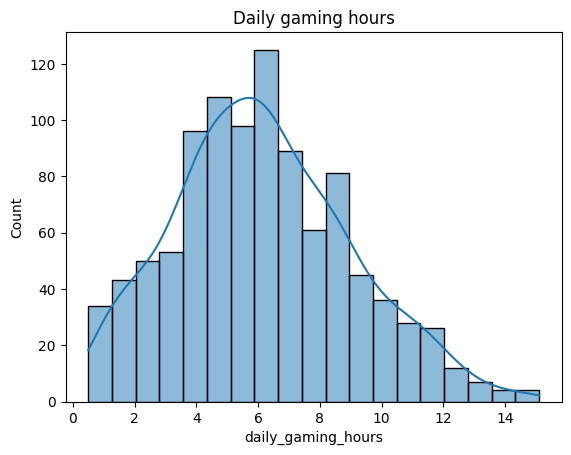

In [12]:
plt.figure()
sns.histplot(df["daily_gaming_hours"],kde=True)
plt.title("Daily gaming hours")
plt.show()

In [13]:
df.columns

Index(['record_id', 'age', 'gender', 'daily_gaming_hours', 'game_genre',
       'primary_game', 'gaming_platform', 'sleep_hours', 'sleep_quality',
       'sleep_disruption_frequency', 'academic_work_performance', 'grades_gpa',
       'work_productivity_score', 'mood_state', 'mood_swing_frequency',
       'withdrawal_symptoms', 'loss_of_other_interests',
       'continued_despite_problems', 'eye_strain', 'back_neck_pain',
       'weight_change_kg', 'exercise_hours_weekly', 'social_isolation_score',
       'face_to_face_social_hours_weekly', 'monthly_game_spending_usd',
       'years_gaming', 'gaming_addiction_risk_level'],
      dtype='object')

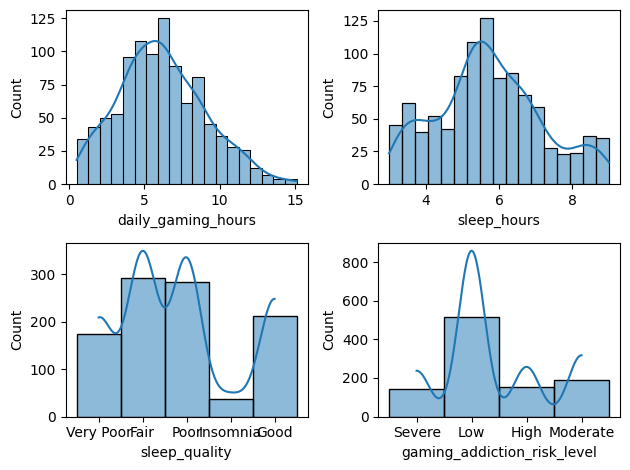

In [14]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(data=df ,x=var,kde=True)

plotting('daily_gaming_hours',1)
plotting('sleep_hours',2)
plotting('sleep_quality',3)
plotting('gaming_addiction_risk_level',4)   
plt.tight_layout() 

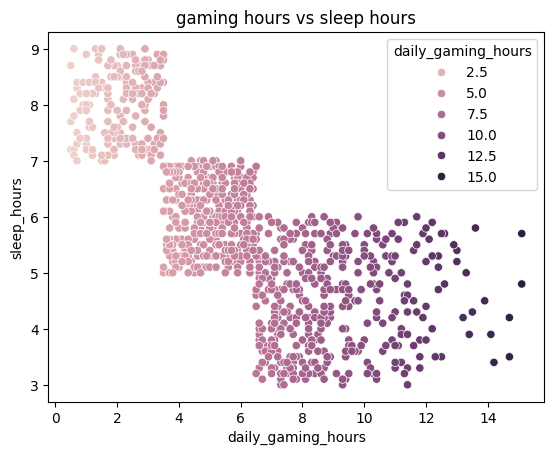

In [15]:
plt.figure()
sns.scatterplot(x='daily_gaming_hours',y='sleep_hours',data=df,hue='daily_gaming_hours')
plt.title("gaming hours vs sleep hours")
plt.show()

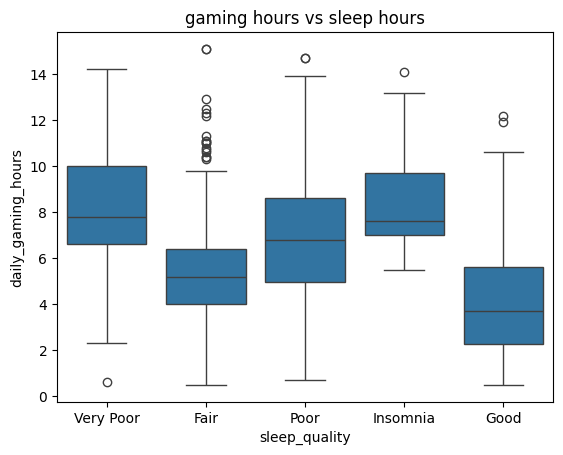

In [16]:
plt.figure()
sns.boxplot(y='daily_gaming_hours',x='sleep_quality',data=df)
plt.title("gaming hours vs sleep hours")
plt.show()

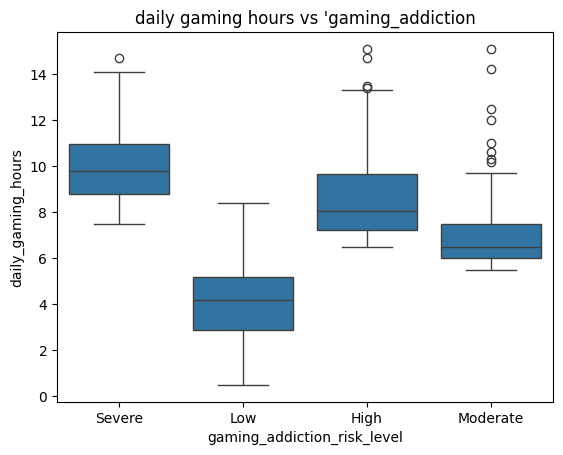

In [17]:
plt.figure()
sns.boxplot(y='daily_gaming_hours',x='gaming_addiction_risk_level',data=df)
plt.title("daily gaming hours vs 'gaming_addiction")
plt.show()

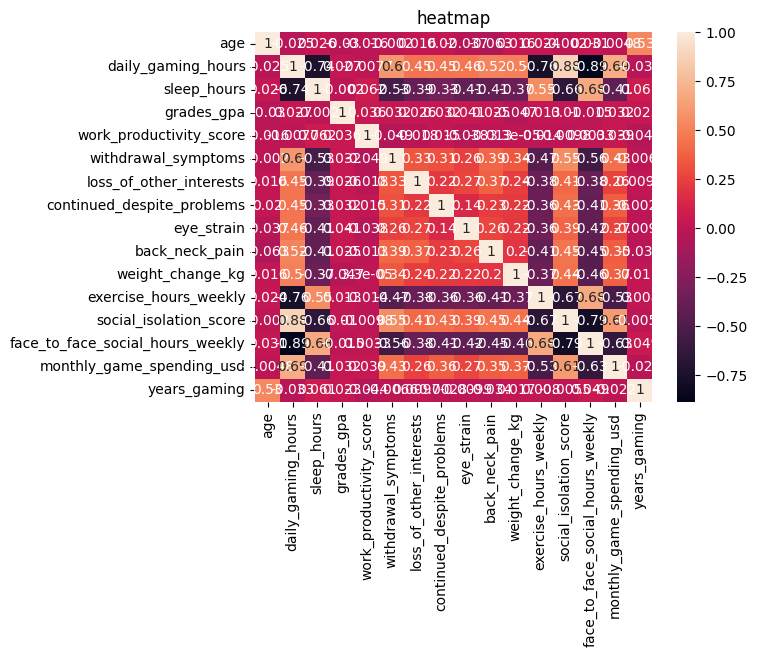

In [18]:
plt.figure()
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)
plt.title("heatmap")
plt.show()

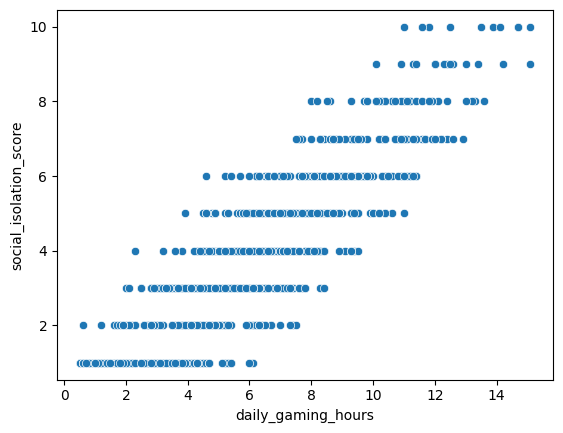

In [19]:
plt.figure()
sns.scatterplot(x='daily_gaming_hours',y= 'social_isolation_score',data=df)
plt.show()

In [20]:
numeric_cols = df.select_dtypes(include=np.number).columns

In [21]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [22]:
categorical_cols = df.select_dtypes(include='object').columns

In [23]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [24]:
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [25]:
df.columns

Index(['record_id', 'age', 'gender', 'daily_gaming_hours', 'game_genre',
       'primary_game', 'gaming_platform', 'sleep_hours', 'sleep_quality',
       'sleep_disruption_frequency', 'academic_work_performance', 'grades_gpa',
       'work_productivity_score', 'mood_state', 'mood_swing_frequency',
       'withdrawal_symptoms', 'loss_of_other_interests',
       'continued_despite_problems', 'eye_strain', 'back_neck_pain',
       'weight_change_kg', 'exercise_hours_weekly', 'social_isolation_score',
       'face_to_face_social_hours_weekly', 'monthly_game_spending_usd',
       'years_gaming', 'gaming_addiction_risk_level'],
      dtype='object')

In [26]:
X=df.drop('gaming_addiction_risk_level',axis=1)
y=df['gaming_addiction_risk_level']

In [27]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [28]:
X_train,X_test,y_train,y_test=train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [29]:
X_train

array([[0.5785124 , 1.        , 0.5       , ..., 0.52095808, 0.17074651,
        0.18181818],
       [0.9338843 , 1.        , 0.        , ..., 0.37724551, 0.20084969,
        0.27272727],
       [0.82369146, 1.        , 0.        , ..., 0.61676647, 0.07157597,
        0.36363636],
       ...,
       [0.74380165, 0.66666667, 0.5       , ..., 0.16766467, 0.29407243,
        0.63636364],
       [0.95867769, 0.33333333, 0.5       , ..., 0.68862275, 0.0738418 ,
        0.72727273],
       [0.28099174, 0.33333333, 0.5       , ..., 0.4491018 , 0.20141614,
        0.72727273]], shape=(291, 26))

In [30]:
from sklearn.preprocessing import StandardScaler

# Create the scaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scal = scaler.fit_transform(X_train)

# Use the SAME scaler to transform the test data
X_test_scal = scaler.transform(X_test)

In [31]:
result = []

In [32]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

In [33]:
for name, model in models.items():
    model.fit(X_train_scal,y_train)
    y_pred=model.predict(X_test_scal)
    acc=accuracy_score(y_test,y_pred)
    
    result.append({
        'Model':name,
        'Accuracy':round(acc,4),
        'F1_score': round(acc,4)
    
    })

In [34]:
result

[{'Model': 'Logistic Regression', 'Accuracy': 0.9041, 'F1_score': 0.9041},
 {'Model': 'Random Forest', 'Accuracy': 0.9452, 'F1_score': 0.9452},
 {'Model': 'SVM', 'Accuracy': 0.9315, 'F1_score': 0.9315},
 {'Model': 'KNN', 'Accuracy': 0.7945, 'F1_score': 0.7945},
 {'Model': 'Decision Tree', 'Accuracy': 0.9178, 'F1_score': 0.9178}]

In [35]:
for name, model in models.items():
    print("=========", name, "=========")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("\nROC-AUC Score:")
    y_prob = model.predict_proba(X_test)
    print(roc_auc_score(y_test, y_prob, multi_class="ovr"))
    
    print("\n\n")


========= Logistic Regression =========
Confusion Matrix:
[[ 6  0  5  2]
 [ 0 38  0  0]
 [ 2  2 15  0]
 [ 1  0  0  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.46      0.55        13
           1       0.95      1.00      0.97        38
           2       0.75      0.79      0.77        19
           3       0.50      0.67      0.57         3

    accuracy                           0.84        73
   macro avg       0.72      0.73      0.72        73
weighted avg       0.83      0.84      0.83        73


ROC-AUC Score:
0.9542609193924982



========= Random Forest =========
Confusion Matrix:
[[10  0  3  0]
 [ 0 38  0  0]
 [ 1  1 17  0]
 [ 3  0  0  0]]

Classification Report:


C:\Users\himan\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\himan\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\himan\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.97      1.00      0.99        38
           2       0.85      0.89      0.87        19
           3       0.00      0.00      0.00         3

    accuracy                           0.89        73
   macro avg       0.63      0.67      0.65        73
weighted avg       0.86      0.89      0.87        73


ROC-AUC Score:
0.9843754685859949



========= SVM =========
Confusion Matrix:
[[11  0  1  1]
 [ 0 38  0  0]
 [ 1  1 17  0]
 [ 1  0  0  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.97      1.00      0.99        38
           2       0.94      0.89      0.92        19
           3       0.67      0.67      0.67         3

    accuracy                           0.93        73
   macro avg       0.86      0.85      0.85        73
weighted avg       0

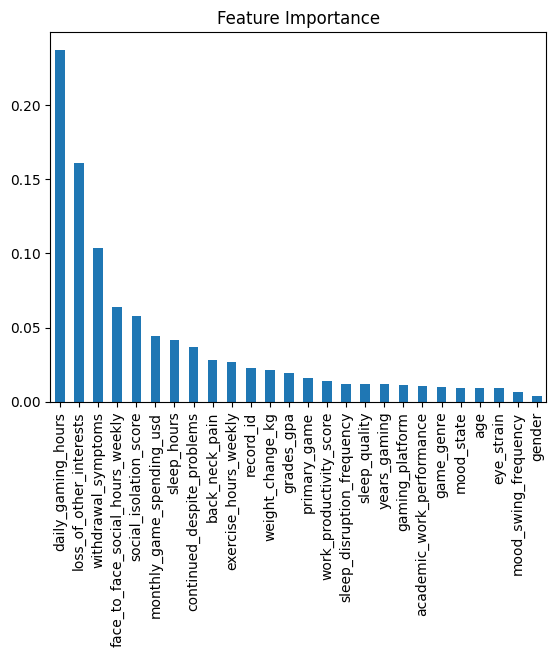

In [36]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

importance = model.feature_importances_

feature_importance = pd.Series(importance, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind="bar")
plt.title("Feature Importance")
plt.show()

In [1]:
%pip install pickle5

Defaulting to user installation because normal site-packages is not writeable
  Using cached pickle5-0.0.11.tar.gz (132 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pickle5
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for pickle5 (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [67 lines of output]
      C:\Users\himan\AppData\Local\Temp\pip-build-env-28q9fk9a\overlay\Lib\site-packages\setuptools\dist.py:765: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
              ********************************************************************************
              Please consider removing the following classifiers in favor of a SPDX license expression:
      
              License :: OSI Approved :: Python Software Foundation License
      
              See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
              ********************************************************************************
      
      !!
        self._finalize_license_expression()
      running bdist_wheel
      running build
      running build_py
      creating build\lib

In [38]:
import joblib

In [39]:
joblib.dump(models['SVM'],'SVM_gaming.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')

['columns.pkl']